# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Mohammad Kalbasi
2.   Student Number: 401211028


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [ ]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [ ]:
dataset = pd.read_csv("./data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test
samples,_  = dataset.shape
index = np.arange(samples)
#np.random.shuffle(index) uncomment this part if you want to first shuffle the data and then choose train and validation data
#after seeing dataset we don't see need for shuffeling data because train and test data seems to be shuffeled before and they don't have a specific pattern(like x values of train be bigger than test) so we didn't shuffle the data but if you want to see the result uncomment the code!
x_train = np.asarray(dataset['X'][index[0:int(samples*0.8)]])
y_train = np.asarray(dataset['Y'][index[0:int(samples*0.8)]])

x_test = np.asarray(dataset['X'][index[int(samples*0.8):]])
y_test = np.asarray(dataset['Y'][index[int(samples*0.8):]])

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [ ]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
bias = np.ones(int(0.8*samples),)
A = np.vstack((x_train,bias)).T
m = np.matmul(np.matmul(np.linalg.inv(np.matmul(A.T,A)),A.T),y_train)

In [ ]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = np.square(np.subtract(y_train,predicted_train_y)).mean()
test_error = np.square(np.subtract(y_test,predicted_test_y)).mean()

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.32467763017774226
MSE test error: 0.3544951192130029


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

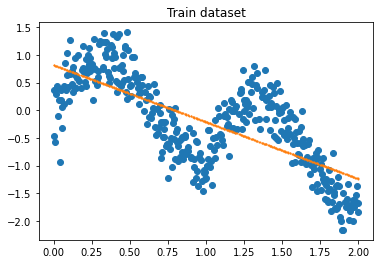

In [ ]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

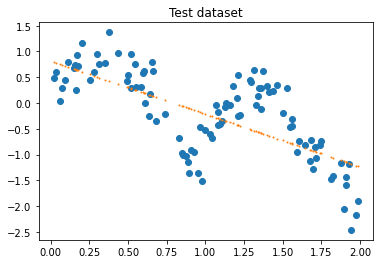

In [ ]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

it's a little tricky to say our result is acceptable only based of mse, because it's only show distance between original and predicted vector so if norm of original signal is very little, even a bad estimation will get low "mse",so it's usually better to normalize mse based on norm of original. but if we had to say anything, based of distribution of y vector they are between 1.5 and -1.5 so we have at least %10 error but so many point have magnitude less than 1.5 so it's a sizable error and not acceptable.
the line we draw follow overall trend of data but it is obvious that it isn't good enough for describing data and it is not appropriate for this dataset.
main problem here is that data doesn't follow a linear realation ship between y and x data so estimating y based on x with simple linear equation will not give us good enough result

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

yes we expect to achive better result, because we add non linearity to our model so it will be more complex and also data have a good local pattern(in each part we see slow changes) that will be used in algorithm like Locally Weighted Linear Regression.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [ ]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        denum = 2*(hyperparameter**2)
        W[i, i] = np.exp(np.dot(-1*(xi-the_query_point), (xi-the_query_point).T)/denum) 
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [ ]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_Y.shape[0] # we change it from train_dataset to train_Y
    train_Y = np.reshape(train_Y,(l,1))
    #X = np.hstack((train_X, np.ones((l, 1))))
    X = np.vstack((train_X,np.ones(l,))).T
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)

    theta = (np.linalg.inv(X.T@W@X))@(X.T@W@train_Y)
    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [ ]:
predicted_test = np.asarray([predict(x_train, y_train, query, 0.02) for query in x_test]).squeeze()
error = np.square(np.subtract(y_test,predicted_test)).mean()
print(f"MSE test error: {error}")

MSE test error: 0.0966317411543251


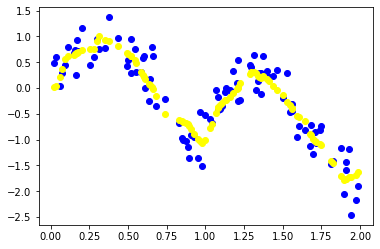

In [ ]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

Yes it performs much better! because first it adds non linearity to our model which is obviosly non linear, and second train and test data distributioin is in a way that we interpolate our data in test data set rather than extrapolait, and in Locally Weighted Linear Regression, points that are closer to the point that we want to estimate have more significant impact, y based of x is rather smooth(there isn't a significant change with small change x) so locally weighing sample is a good method to estimate y and help to lower our error

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

Yes! because if we think about it, KNN is really like weighed regression, but we only choose closest point to estimate output, and our data have a good local patterns so we expect that knn give us good results, but probably not as good as  Locally Weighted Linear Regression

### Part10:
Implementing the `KNN model`.

In [ ]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.sqrt(((x1-x2)**2)) # implement the distance function
        return distance

    def return_nn_ids(self, x):
        dist_mat = self.distance(self.X,x)
        sort_index = np.argsort(dist_mat)
        
        indices = sort_index[0:self.k] # find indices of k nearest neighbours to x
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = np.mean(self.Y[neareest_indices]) # it also can be median or other operators but mean is most common one
        return predicted_y

In [ ]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = np.asarray([model.predict(x) for x in x_test]).squeeze()
    error = np.square(np.subtract(y_test,predicted_y)).mean()
    return error, predicted_y

In [ ]:
#cross validation
samples_train = len(y_train)
x_train_train = np.asarray(x_train[0:int(samples_train*0.8)])
y_train_train= np.asarray(y_train[0:int(samples_train*0.8)])

x_val = np.asarray(x_train[int(samples_train*0.8):])
y_val = np.asarray(y_train[int(samples_train*0.8):])

k_score = np.zeros((30,1))
for i in range(30):
  error, predicted_y = evaluation(i+1, x_train_train, y_train_train, x_val, y_val)
  k_score[i] = error




In [ ]:
print(f"best k based on cross validation = {np.argmin(k_score) +1}" )

best k based on cross validation = 11


In [ ]:
k = 19 # in previous part we told that k = 11 is best score for validation but here with testing we get minimum test error for k = 19
# but mse error for this two selection of k are so close(error for k = 11 is 0.098 wich is very close)
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.09687363389746836


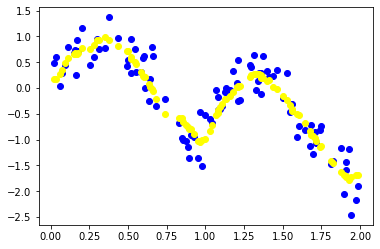

In [ ]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

yes it performs well! if we compare accuracy the result is as good as  Locally Weighted Linear Regression, if we compare two methods based on hyperparameter tau that we set, in Locally Weighted Linear Regression we used small variance for computing distance so based on point distribution we can roughly say that it select 20~30 nearest points and others don't have any significant impact on our estimation so it is expected that our mse for this two method should be close to each other, and also based on figure we can se that knn can follow the main trend of signal so it seem both knn and Locally Weighted Linear Regression are good methods for this dataset